# Problem Solving

## Baggages et vacance

In [1]:
def take_objects(obj_importance, obj_sizes, car_space):
  '''
  fonction qui détermine les objets à inclure afin que la sommes de ses tailles ne dépasse pas la limite d'espace dans la voiture
  et que l'importance totale des objets inclues soit la plus élevée possible.
  - Input:
    obj_importance: de taille  nobjets  represente l'importance de chaque objet.
    obj_sizes: de taille  nobjets  represente les poids de chaque objet.
    car_space: est l'espace totale disponible dans la voiture.
  - Output:
    Valeur maximale d'importance
    Liste des objets pris
  '''
  n_objets = len(obj_importance)

  # Chaque case de la matrice temp va représenter la valeur maximale d'importance avec i objets et w espace
  # La dernière case va donc représenter la valeur maximale d'importance qu'on peut atteindre avec car_space
  temp = [[0 for i in range(car_space + 1)] for j in range(n_objets + 1)]

  # deux boucle pour remplir la matrice des valeur d'importance, la première pour itérer sur les lignes de la matrice (index de l'objet)
  # et la deuxième pour itérer sur les colonnes de la matrice (indice de l'espace maximale)
  for i in range(1, n_objets + 1):
    for w in range(car_space + 1):
      if obj_sizes[i - 1] <= w:
        # Si la taille de l'objet i est plus petit que la taille maximale (donc on peut prendre cet objet)
        # on remplit la case [i][w] avec le max entre la valeur d'importance d'objet précédent (i-1)
        # et la valeur d'importance si on remplace l'objet précédent (i-1) avec l'objet (i)
        temp[i][w] = max(temp[i - 1][w], temp[i - 1][w - obj_sizes[i - 1]] + obj_importance[i - 1])
      else:
        # Sinon on peut pas prendre l'objet (i) et on conserve la valeur d'importance de l'objet précédent (i-1)
        temp[i][w] = temp[i - 1][w]

  # Une boucle pour extraire la liste des objets pris
  included_objects = []
  i, w = n_objets, car_space
  while i > 0 and w > 0:
    # Si la valeur d'importance de la ligne i et colonne w n'est pas la même avec la valeur de la ligne i-1
    # Donc l'objet i - 1 est inclus dans la liste
    if temp[i][w] != temp[i - 1][w]:
        included_objects.append(i - 1)
        w -= obj_sizes[i - 1]
    i -= 1

  # On inverse la liste car on a fait un parcours bottom-up
  return temp[n_objets][car_space], list(reversed(included_objects))

# La complexité de la première boucle est de O(N * W) ou N est le nombre des objets et W et le car_space,
# La deuxième boucle (d'extraction de la liste des objets inclus) est de complixité O(max(W , N)) au pire des cas
# donc la complixité de notre algorithme est de O(N * W) car O(N * W) + O(max(W , N)) = O(N * W)

In [2]:
import time

obj_importance = [10, 9, 6, 5, 8, 2, 1, 7, 4, 3, 7, 2, 6, 5, 4, 5, 3, 1, 6, 4, 5, 3, 1, 6, 10, 9, 6, 5, 8, 4, 5, 3, 1, 6, 10, 9, 6, 5, 8, 9, 6, 5, 8, 2, 1, 7, 4, 3, 7, 2, 6, 5, 4, 5, 3, 1, 6, 4, 5, 3, 1, 6, 10, 9, 6, 5, 8, 4, 5, 3, 1, 6, 10, 9, 6, 5, 8, 9, 6, 5, 8, 2, 1, 7, 4, 3, 7, 2, 6, 5, 4, 5, 3, 1, 6, 4, 5, 3, 1, 6, 10, 9, 6, 5, 8, 4, 5, 3, 1, 6, 10, 9, 6, 5, 8]
obj_sizes = [1, 2, 5, 6, 7, 8, 9, 10, 3, 4, 12, 3, 4, 5, 7, 2, 9, 2, 5, 7, 2, 9, 2, 5, 1, 2, 5, 6, 7, 7, 2, 9, 2, 5, 1, 2, 5, 6, 7, 2, 5, 6, 7, 8, 9, 10, 3, 4, 12, 3, 4, 5, 7, 2, 9, 2, 5, 7, 2, 9, 2, 5, 1, 2, 5, 6, 7, 7, 2, 9, 2, 5, 1, 2, 5, 6, 7, 2, 5, 6, 7, 8, 9, 10, 3, 4, 12, 3, 4, 5, 7, 2, 9, 2, 5, 7, 2, 9, 2, 5, 1, 2, 5, 6, 7, 7, 2, 9, 2, 5, 1, 2, 5, 6, 7]
car_space = 30


start_time = time.time()
valeur_impo_max, liste_objets_pris = take_objects(obj_importance, obj_sizes, car_space)
end_time = time.time()
print(f'La valeur d\'importance maximale:\n{valeur_impo_max}\n')
print(f'Liste des objets inclus:\n{liste_objets_pris}\n')
print(f'Temps d\'éxécution:\n{round(end_time - start_time, 5)} s')

La valeur d'importance maximale:
161

Liste des objets inclus:
[0, 1, 15, 20, 24, 25, 34, 35, 39, 62, 63, 72, 73, 77, 100, 101, 110, 111]

Temps d'éxécution:
0.01172 s


## Sudoku

Puzzle Sudoku:
[5, 3, 0, 0, 7, 0, 0, 0, 0]
[6, 0, 0, 1, 9, 5, 0, 0, 0]
[0, 9, 8, 0, 0, 0, 0, 6, 0]
[8, 0, 0, 0, 6, 0, 0, 0, 3]
[4, 0, 0, 8, 0, 3, 0, 0, 1]
[7, 0, 0, 0, 2, 0, 0, 0, 6]
[0, 6, 0, 0, 0, 0, 2, 8, 0]
[0, 0, 0, 4, 1, 9, 0, 0, 5]
[0, 0, 0, 0, 8, 0, 0, 7, 9]

Solution Sudoku:
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


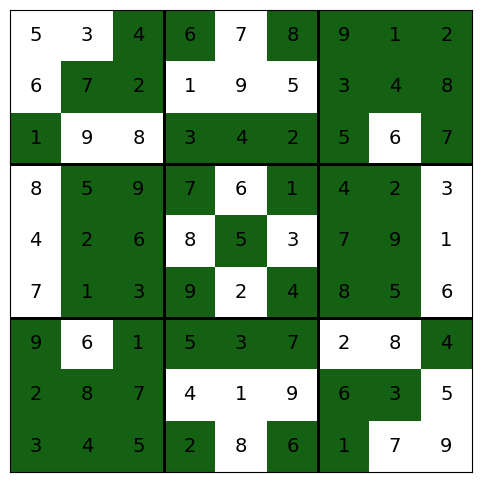

In [3]:
import matplotlib.pyplot as plt

def sudoku(puzzle):
  '''
  Fonction qui retourne la solution d'un puzzle Sudoku
  - Input:
    puzzle: une matrice qui contient le puzzle de sudoku non résolu
  - Output:
    solution de puzzle
  '''
  sudoku_puzzle = [row[:] for row in puzzle]
  def is_valid(num, row, col):
    '''
    Fonction qui vérifie si le numéro (num) peur être placé dans la case (row, col)
    - Input:
      num: un numero entre 1 et 9
      row: indice de ligne dans la matrice sudoku
      col: indice de colonne dans la matrice sudoku
    - Output:
      True (le numéro peut être placé) ou False (On peut pas)

    '''
    # Vérifie si num existe déja dans la ligne
    if num in sudoku_puzzle[row]:
      return False
    # Vérifie si num existe déja dans la colonne
    if num in [sudoku_puzzle[i][col] for i in range(9)]:
      return False
    # vérifie si num existe déja dans la sous-grille 3X3
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if sudoku_puzzle[i][j] == num:
                return False
    return True

  def solve():
    '''
    Fonction pour résoudre le puzzle en remplaçant les cases contenants des 0 avec un numéro entre 0 et 9
    tout en vérifiant is le numéro est valide en utilisant la fonctio is_valid
    - Output:
      True si le puzzle est résolu, False sinon
    '''
    for row in range(9):
        for col in range(9):
            if sudoku_puzzle[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(num, row, col):
                        sudoku_puzzle[row][col] = num
                        if solve():
                            return True
                        # Si la solution partielle ne mène pas à la solution finale, revenir en arrière et essayer un autre numéro.
                        sudoku_puzzle[row][col] = 0
                # Si aucun numéro ne convient, annuler la dernière modification et retourner False.
                return False
    return True

  solve()
  return sudoku_puzzle

def plot_sudoku(solution, puzzle):
  '''
  Fonction pour afficher la solution de Sudoku
  '''
  fig, ax = plt.subplots(figsize=(6, 6))
  ax.matshow([[1 if cell == 0 else 0 for cell in row] for row in puzzle], cmap='Greys', alpha = 0.8)
  for i in range(9):
    for j in range(9):
      # Utiliser une couleur différente pour les cases résolues (vert)
      if puzzle[i][j] == 0:
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, facecolor='green', alpha=0.6)
        ax.add_patch(rect)
      ax.text(j, i, str(solution[i][j]), ha='center', va='center', color='black', fontsize=14)
      if (i + 1) % 3 == 0 and i < 8:
        plt.axhline(y=i + 0.5, color='black', linewidth=2)
      if (j + 1) % 3 == 0 and j < 8:
        plt.axvline(x=j + 0.5, color='black', linewidth=2)
  plt.xticks([])
  plt.yticks([])
  plt.show()

puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Puzzle Sudoku:")
for row in puzzle:
    print(row)
print("\nSolution Sudoku:")
solution = sudoku(puzzle)
for row in solution:
    print(row)

plot_sudoku(solution, puzzle)

## Carrés latins

In [ ]:
import numpy as np
from itertools import combinations_with_replacement

def indicium(n, k):
  '''
  Fonction qui retourne la solution du carrés latins (matrice n x n)
  - Input:
    n: dimension de la matrice / seuil des nombres possible dans la matrice
    k: la somme du diagonale de la matrice
  - Output:
    solution de carrés latins
  '''

  # cas spécial ou la solution n'existe pas
  if k == n+1 or k == n**2 - 1:
    print(f"\nSolution non existante pour n = {n} et k = {k}")
    return None


  def is_valid(num, row, col, matrice):
    '''
    Fonction qui vérifie si le numéro (num) peur être placé dans la case (row, col)
    - Input:
      num: un numero entre 1 et 9
      row: indice de ligne dans la matrice sudoku
      col: indice de colonne dans la matrice sudoku
    - Output:
      True (le numéro peut être placé) ou False (On peut pas)

    '''
    # Vérifie si num existe déja dans la ligne
    if num in matrice[row]:
      return False
    # Vérifie si num existe déja dans la colonne
    if num in [matrice[i][col] for i in range(n)]:
      return False

    return True

  def solve(matrice):
    '''
    Fonction pour résoudre le puzzle en remplaçant les cases contenants des 0 avec un numéro entre 1 et 9
    tout en vérifiant is le numéro est valide en utilisant la fonctio is_valid
    (même fonction que soduku en garedant seulement les conditions de ligne et colonne)
    - Input:
      Matrice à remplir
    - Output:
      True si le puzzle est résolu, False sinon
    '''
    for row in range(n):
        for col in range(n):
            if matrice[row][col] == 0:
                for num in range(1, n + 1):
                    if is_valid(num, row, col, matrice):
                        matrice[row][col] = num
                        if solve(matrice):
                            return True
                        # Si la solution partielle ne mène pas à la solution finale, revenir en arrière et essayer un autre numéro.
                        matrice[row][col] = 0
                # Si aucun numéro ne convient, annuler la dernière modification et retourner False.
                return False
    return True

  def generate_list_sum(N, K):
    '''
    Fonction qui genère une pour chaque itération une combinaison de N nombres compris
    entre 1 et N et que la somme de ces nombres == K
    - Input:
      N et K: même arguments que la fonction indicium
    '''
    numbers = list(range(1, N+1))
    combinations_list = []

    # générer une liste de combinaison et parcourir sur toutes les combinaison
    for combination in combinations_with_replacement(numbers, N):
        # si la somme de cette combinaison est égale à K
        if sum(combination) == K:

            matrice = np.zeros((N,N))
            # initialiser une matrice avec des zeros et la diagonale avec la combinaison qui vérifie la condition de (somme = K)
            for i in range(len(matrice)):
              matrice[i][i] = combination[i]

            # éxecuter la fonction solve() qui va remplir la matrice avec les règle exigé et retourne True s'il existe une solution, False sinon
            if solve(matrice):
              # si la solution existe retouner la solution
              return matrice
    # Sinon retourner False (pas de solution)
    return False

  # en appelant cette fonction, on génère une liste de combinaison et dans la même fonction
  # on vérifie pour chaque combinaison si la solution existe (remplissage avec règles de soduku)
  sol = generate_list_sum(n, k)

  # si la fonction ci-dessus ne retourne pas une liste numpy (elle a retourné False), pas de solution
  if not isinstance(sol, np.ndarray):
    print(f"\nSolution non existante pour n = {n} et k = {k}")
    return None

  # On vérifie aussi s'il existe des 0 dans la matrice remplit, sinon la solution est valable
  for row in sol:
        for element in row:
            if element == 0:
              print(f"\nSolution non existante pour n = {n} et k = {k}")
              return None

  # retourner la solution finale
  return sol.astype(int)

# fonction pour sousligner les elements du diagonale
def format_element(element):
    return f'\033[4m{element}\033[0m'


In [ ]:
# les tests:

for n in range(5):
  for k in range(n,n**2 + 1):

    solution = indicium(n, k)

    if isinstance(solution, np.ndarray):
      print(f"\nsolution de carrés latins avec n = {n} et k = {k}:")

      for i in range(len(solution)):
          for j in range(len(solution[i])):
              if i == j:
                  print(" "+str(format_element(solution[i][j])), end=' ')
              else:
                  print(" "+str(solution[i][j]), end=' ')
          print()


solution de carrés latins avec n = 0 et k = 0:

solution de carrés latins avec n = 1 et k = 1:
 1 

solution de carrés latins avec n = 2 et k = 2:
 1  2 
 2  1 

Solution non existante pour n = 2 et k = 3

solution de carrés latins avec n = 2 et k = 4:
 2  1 
 1  2 

solution de carrés latins avec n = 3 et k = 3:
 1  2  3 
 3  1  2 
 2  3  1 

Solution non existante pour n = 3 et k = 4

Solution non existante pour n = 3 et k = 5

solution de carrés latins avec n = 3 et k = 6:
 1  3  2 
 3  2  1 
 2  1  3 

Solution non existante pour n = 3 et k = 7

Solution non existante pour n = 3 et k = 8

solution de carrés latins avec n = 3 et k = 9:
 3  1  2 
 2  3  1 
 1  2  3 

solution de carrés latins avec n = 4 et k = 4:
 1  2  3  4 
 2  1  4  3 
 3  4  1  2 
 4  3  2  1 

Solution non existante pour n = 4 et k = 5

solution de carrés latins avec n = 4 et k = 6:
 1  2  3  4 
 2  1  4  3 
 3  4  2  1 
 4  3  1  2 

solution de carrés latins avec n = 4 et k = 7:
 1  2  3  4 
 3  1  4  2 
 4  

In [ ]:
# (pour n > 5 le nombres de combinaisons possible est trés grand, donc le temps d'exécution augmente exponentiellement)
# si vous n'avez pas encore exécuté cette cellule, le résultat est correct et nous a pris environ 16 minutes pour exécuter
# les tests pour n = 6 et k entre 6 et 15

for k in range(6,16):

  solution = indicium(6, k)

  if isinstance(solution, np.ndarray):
    print(f"\nsolution de carrés latins avec n = {n} et k = {k}:")

    for i in range(len(solution)):
        for j in range(len(solution[i])):
            if i == j:
                print(" "+str(format_element(solution[i][j])), end=' ')
            else:
                print(" "+str(solution[i][j]), end=' ')
        print()


solution de carrés latins avec n = 6 et k = 6:
 1  2  3  4  5  6 
 2  1  4  3  6  5 
 3  5  1  6  2  4 
 4  6  5  1  3  2 
 5  4  6  2  1  3 
 6  3  2  5  4  1 

Solution non existante pour n = 6 et k = 7

solution de carrés latins avec n = 6 et k = 8:
 1  2  3  4  5  6 
 2  1  4  3  6  5 
 5  6  1  2  3  4 
 6  5  2  1  4  3 
 3  4  5  6  2  1 
 4  3  6  5  1  2 

solution de carrés latins avec n = 6 et k = 9:
 1  2  3  4  5  6 
 2  1  4  3  6  5 
 3  5  1  6  4  2 
 5  6  2  1  3  4 
 4  3  6  5  2  1 
 6  4  5  2  1  3 

solution de carrés latins avec n = 6 et k = 10:
 1  2  3  4  5  6 
 2  1  4  3  6  5 
 4  5  1  6  3  2 
 5  6  2  1  4  3 
 3  4  6  5  2  1 
 6  3  5  2  1  4 

solution de carrés latins avec n = 6 et k = 11:
 1  2  3  4  5  6 
 2  1  4  5  6  3 
 3  5  1  6  4  2 
 5  6  2  1  3  4 
 6  4  5  3  2  1 
 4  3  6  2  1  5 

solution de carrés latins avec n = 6 et k = 12:
 1  2  3  4  6  5 
 2  1  4  6  5  3 
 3  6  1  5  4  2 
 6  5  2  1  3  4 
 5  4  6  3  2  1 


# Régression logistique

## Optimisation par descente de gradient

In [4]:
from sklearn.datasets import make_moons, make_circles, make_blobs
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:

  def __init__(self, n_iterations=500, optimizer = 'grad', lr = 0):
    self.n_iterations = n_iterations
    if optimizer == 'newton' or 'grad':
      self.optimizer = optimizer
    else:
      raise Exception("Veuillez choisir une valeur d'optimiseur entre 'newton' pour l'optimisation newton ou 'grad' pour la descente en gradient.")
    self.beta = None
    self.erreurs = []
    self.lr = lr

  def sigmoid(self, Z: np.ndarray) -> np.ndarray:
    return 1/(1 + np.exp(-Z))

  def fit(self, X, y):
    # descente de gradient
    if self.optimizer == "grad":

      # caculons le taux d'apprentissage selon la formule donnée
      if self.lr == 0:
        taux_apprentissage = 4/(X.max()**2)
      else:
        taux_apprentissage = self.lr

      # rajouter une colonne de 1 à X
      X = np.column_stack((np.ones(X.shape[0]), X))
      _, n_features = X.shape

      # Initialiser beta avec des zeros
      self.beta = np.zeros(n_features)

      # boucle d'entrainement
      for _ in range(self.n_iterations):

        # Calculer le gradient et modifier les valeurs de parametres beta
        gradient = np.dot(X.T, (self.sigmoid(np.dot(X, self.beta)) - y))
        self.beta -= taux_apprentissage * gradient

        # calculer et stocker les valeurs des erreurs (fonction objectif)
        sg = self.sigmoid(np.dot(X, self.beta))
        # pour eliminer les valeur 1 car c'est impossible de calculer log(1 - 1)
        sg[sg == 1] -= 0.0000001
        erreur = -np.sum(y * np.log(sg) + (1 - y) * np.log(1 - sg))
        self.erreurs.append(erreur)

    elif self.optimizer == "newton":
      # rajouter une colonne de 1 à X
      X = np.column_stack((np.ones(X.shape[0]), X))

      # Initialiser beta avec des zeros
      self.beta = np.zeros(X.shape[1])

      for _ in range(self.n_iterations):

        # Calculer le gradient et H
        sg = self.sigmoid(np.dot(X, self.beta))
        gradient = np.dot(X.T, (sg - y))
        H = np.dot(X.T, np.dot(np.diag(sg * (1 - sg)), X))

        # modifier les valeurs de parametres beta
        self.beta -= np.linalg.inv(H).dot(gradient)

        # calculer et stocker les valeurs des erreurs (fonction objectif)
        sg = self.sigmoid(np.dot(X, self.beta))
        # pour eliminer les valeur 1 car c'est impossible de calculer log(1 - 1)
        sg[sg == 1] -= 0.0000001
        erreur = -np.sum(y * np.log(sg) + (1 - y) * np.log(1 - sg))
        self.erreurs.append(erreur)

  def predict(self, X):
    if self.beta is None:
        raise Exception("Model non-entrainé. il faut appeler fit() d'abord.")

    # rajouter une colonne de 1 à X
    X = np.column_stack((np.ones(X.shape[0]), X))

    # prédiction selon les valeurs de beta
    y_pred = self.sigmoid(np.dot(X, self.beta))

    # arrondir le résultats de la fonction sigmoid pour donner la classe d'appartenance de chaque ligne (soit 0 soit 1)
    y_pred = np.round(y_pred)
    return y_pred


## Comparaison de la vitesse de convergence

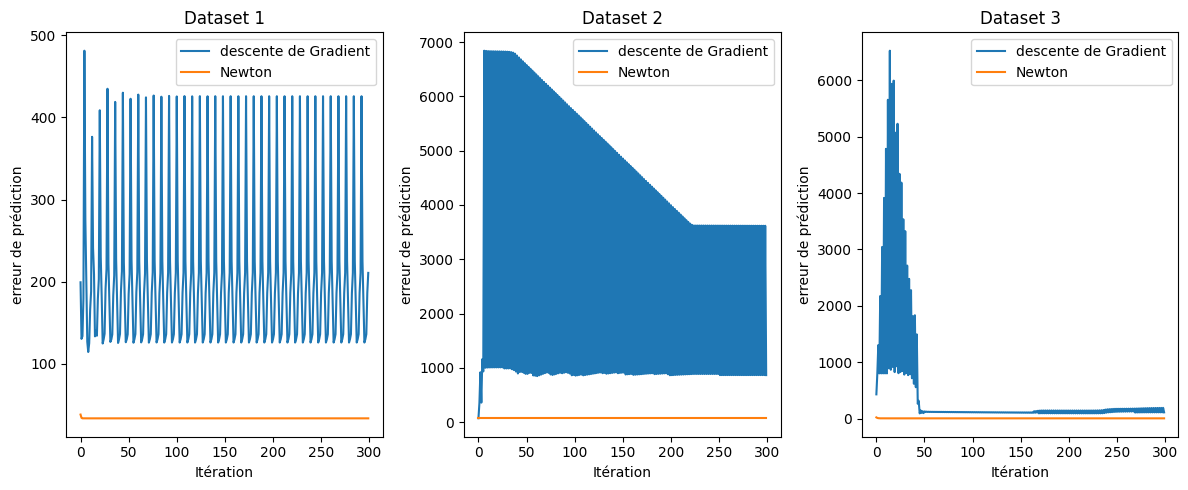

In [9]:
# Affichez les graphiques d'évolution de la fonction objectif pour les trois jeux de données
plt.figure(figsize=(12, 5))
for i, dataset in enumerate(datasets):
  X, y = dataset
  plt.subplot(1, 3, i+1)
  plt.title(f'Dataset {i + 1}')

  model_grad = LogisticRegression(n_iterations=300 ,optimizer='grad')
  model_newton = LogisticRegression(n_iterations=300 ,optimizer='newton')

  model_grad.fit(X,y)
  model_newton.fit(X,y)

  plt.plot(range(model_grad.n_iterations), model_grad.erreurs, label="descente de Gradient")
  plt.plot(range(model_newton.n_iterations), model_newton.erreurs, label="Newton")

  plt.xlabel("Itération")
  plt.ylabel("erreur de prédiction")
  plt.legend()

plt.tight_layout()

# la methode d'optimization de newton a pu converger en 4 iterations pour le premier dataset, une itération pour le deuxieme et 8 itérations pour la dernière
# (on a fait un print sur les erreurs et on a pris l'itération ou l'erreur a pris une valeur constante)
# par contre la descente de gradient n'a pa pu converger sur les deux premiers datasets à cause d'un taux d'apprentissage trés grand (la formule 4/lambda^2
# donne une valeur trés grande), et pour le trosième dataset la descente de gradient a convergé dans 48 itérations

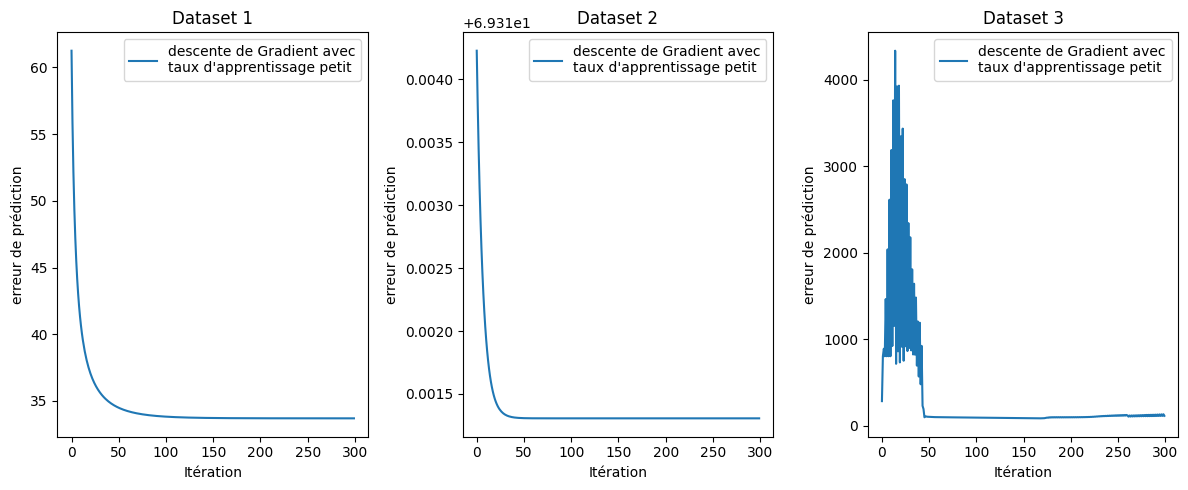

In [8]:
# un taux d'apprentissage petit nous donne ces résultats

plt.figure(figsize=(12, 5))
for i, dataset in enumerate(datasets):
  X, y = dataset
  plt.subplot(1, 3, i+1)
  plt.title(f'Dataset {i + 1}')

  model_grad_2 = LogisticRegression(n_iterations=300 ,optimizer='grad', lr = 0.01)

  model_grad_2.fit(X,y)

  plt.plot(range(model_grad.n_iterations), model_grad_2.erreurs, label="descente de Gradient avec\ntaux d'apprentissage petit")

  plt.xlabel("Itération")
  plt.ylabel("erreur de prédiction")
  plt.legend()

plt.tight_layout()

## frontières de décision

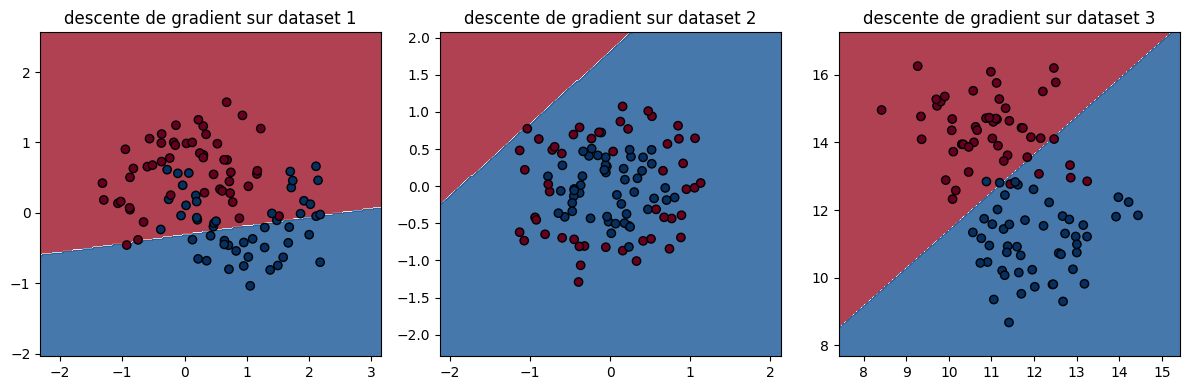

In [13]:
# Affichez les frontières de décision pour la méthode de descente de gradien
plt.figure(figsize=(12, 4))
for i, dataset in enumerate(datasets):
  X, y = dataset
  plt.subplot(1, 3, i+1)
  plt.title(f'Dataset {i + 1}')

  model_grad_3 = LogisticRegression(optimizer="grad")
  model_grad_3.fit(X, y)


  # Créez une grille de points pour la visualisation de la frontière de décision
  h = .02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  grid_points = np.c_[xx.ravel(), yy.ravel()]

  # Prédisez les classes pour les points de la grille
  Z_gradient = model_grad_3.predict(grid_points)

  # Remodelez la sortie pour l'affichage
  Z_gradient = Z_gradient.reshape(xx.shape)

  # Affichez les frontières de décision
  plt.contourf(xx, yy, Z_gradient, cmap=plt.cm.RdBu, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
  plt.title(f"descente de gradient sur dataset {i+1}")

plt.tight_layout()
plt.show()

# on remarque que la descente de gradient marche bien sur le dataset 3, par contre il est moin bon sur le premier dataset (frontière un peu décalé)
# et pour le deuxième dataset il a classé toutes les points comme bleu (donc il n'a pas converger du tout), ça revient au fait que la séparation des deux classes
# n'est pas linéaire pour le deuxième dataset

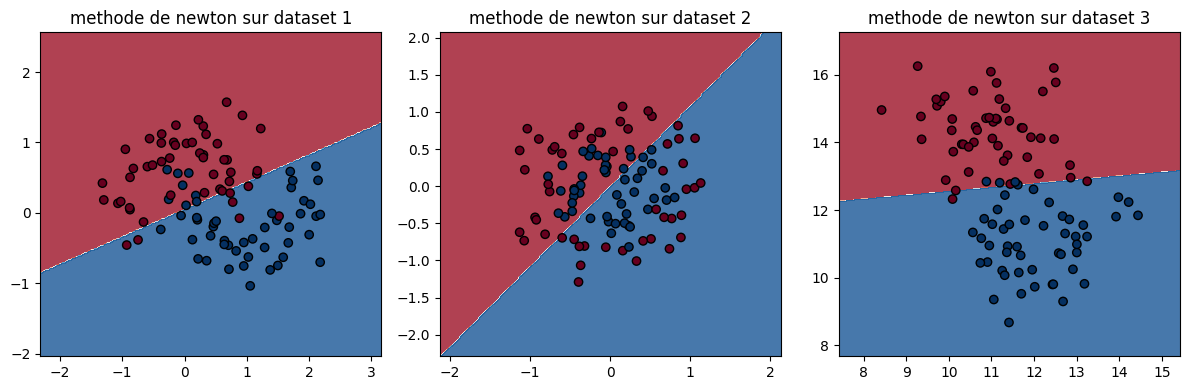

In [14]:
# Affichez les frontières de décision pour la méthode de newton
plt.figure(figsize=(12, 4))
for i, dataset in enumerate(datasets):
  X, y = dataset
  plt.subplot(1, 3, i+1)
  plt.title(f'Dataset {i + 1}')

  model_newton_2 = LogisticRegression(optimizer="newton")
  model_newton_2.fit(X, y)


  # Créez une grille de points pour la visualisation de la frontière de décision
  h = .02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  grid_points = np.c_[xx.ravel(), yy.ravel()]

  # Prédisez les classes pour les points de la grille
  Z_gradient = model_newton_2.predict(grid_points)

  # Remodelez la sortie pour l'affichage
  Z_gradient = Z_gradient.reshape(xx.shape)

  # Affichez les frontières de décision
  plt.contourf(xx, yy, Z_gradient, cmap=plt.cm.RdBu, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
  plt.title(f"methode de newton sur dataset {i+1}")

plt.tight_layout()
plt.show()

# la régression logistique avec la méthode de newton a pu séparer les deux classes du premier et troisième dataset, mais le deuxième dataset n'est pas lineairement séparable
# donc il nécessite un modele non-linéaire

# Arbres

## Arbres de décision

### Imports et intialisation du Dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log2

from sklearn.datasets import make_moons, make_circles, make_blobs
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

### Classe Noued

In [27]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # pour le nœud de décision
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # pour le nœud feuille
        self.value = value

### Classe arbre

In [28]:
class DecisionTree():
    def __init__(self, criterion="gini", min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialiser la racine de l'arbre
        self.root = None

        # initialiser le critère
        self.criterion = criterion

        # conditions d'arrêt
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X = [row[:-1] for row in dataset]
        Y = [row[-1] for row in dataset]

        num_samples = len(dataset)
        num_features = len(dataset[0]) - 1


        # split jusqu'à ce que les conditions d'arrêt soient remplies
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # Trouver la meilleure répartition
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # Vérifier si le gain d'information est positif
            if best_split["info_gain"]>0:
                # construire le sous-arbre gauche de manière récursive
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # construire le sous-arbre de droite de manière récursive
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # retourner le nœud de décision
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # calculer le nœud feuille
        leaf_value = self.calculate_leaf_value(Y)
        # renvoie le nœud feuille
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionnaire pour stocker la meilleure répartition
        best_split = {}
        max_info_gain = -float("inf")

        # boucle sur l'ensemble des caractéristiques
        for feature_index in range(num_features):
            feature_values = [row[feature_index] for row in dataset]
            possible_thresholds = list(set(feature_values))  # Obtenir des valeurs uniques comme seuils

            # boucle sur toutes les valeurs des caractéristiques présentes dans les données
            for threshold in possible_thresholds:
                # obtenir la répartition actuelle
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # vérifier si les enfants ne sont pas nuls
                if len(dataset_left)>0 and len(dataset_right)>0:
                    #y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    y = [row[-1] for row in dataset]
                    left_y = [row[-1] for row in dataset_left]
                    right_y = [row[-1] for row in dataset_right]

                    # calculer le gain d'information
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # mettre à jour la meilleure répartition
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # retour meilleure répartition
        return best_split

    def split(self, dataset, feature_index, threshold):
      ''' function to split the data '''

      dataset_left = []
      dataset_right = []

      for row in dataset:
          if row[feature_index] <= threshold:
              dataset_left.append(row)
          else:
              dataset_right.append(row)

      return dataset_left, dataset_right


    def information_gain(self, parent, l_child, r_child):
        ''' function to compute information gain '''
        mode = self.criterion

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        elif mode == "entropy":
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain



    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = list(set(y))  # Obtenir des étiquettes de classe uniques sous forme de liste
        entropy = 0

        for cls in class_labels:
            p_cls = y.count(cls) / len(y)
            entropy += -p_cls * log2(p_cls) if p_cls != 0 else 0

        return entropy


    def gini_index(self, y):
      ''' function to compute gini index '''

      class_labels = set(y)  # Utilisation d'un ensemble pour obtenir des étiquettes de classe uniques
      gini = 0
      for cls in class_labels:
          p_cls = y.count(cls) / len(y)
          gini += p_cls ** 2
      return 1 - gini



    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = [list(x) + [y] for x, y in zip(X, Y)]  # Combiner X et Y pour créer l'ensemble de données
        self.root = self.build_tree(dataset)



    def predict(self, X):
        ''' function to predict new dataset '''

        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

### Visualisation

In [29]:
import numpy as np

def get_feature_names(dataset):
    # Si le jeu de données est une DataFrame, retourner les noms de colonnes
    if hasattr(dataset, 'columns'):
        return dataset.columns.tolist()
    else:
        # Supposons que les noms des fonction sont de la forme "feature_0", "feature_1", etc.
        # Générer une liste de noms de fonction basée sur le nombre de fonction dans le jeu de données
        return [f'Feature {i}' for i in range(dataset.shape[1])]
def plot_decision_boundary_forest(X, Y, model, title, feature_names=None):
    # Taille du pas dans la maille pour la frontière de décision
    h = .02
    # Définir les limites des axes x et y en ajoutant/soustrayant 1 à partir des données
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Créer une grille de points avec un pas h entre eux
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prédire les étiquettes pour chaque point dans la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Remodeler les prédictions pour correspondre à la forme de la grille
    Z = np.array(Z).reshape(xx.shape)

    # Tracer la frontière de décision avec des couleurs rouge et bleu
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

    # Tracé des points réels en utilisant des couleurs selon les étiquettes
    scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.RdYlBu, s=20)

    # Ajouter le titre, les étiquettes d'axe x et y
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Si des noms de fonction sont fournis, masquer les marques d'axe
    if feature_names:
        plt.xticks(())
        plt.yticks(())

        # Ajouter une légende pour chaque fonction
        legend_labels = [f'Label {i}' for i in range(len(feature_names))]
        plt.legend(handles=scatter.legend_elements()[0], title='Label', labels=legend_labels, loc='lower right')

    # Afficher le tracé
    plt.show()


def plot_decision_boundary(X, Y, model, title, feature_names=None):
    h = .02  # taille de pas
    x_min, x_max = np.array(X)[:, 0].min() - 1, np.array(X)[:, 0].max() + 1
    y_min, y_max = np.array(X)[:, 1].min() - 1, np.array(X)[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(model.predict(mesh_points)).reshape(xx.shape)

    plt.contourf(xx, yy, Z,  cmap=plt.cm.RdYlBu, alpha=0.8)

    # nuage des points pour les points réels
    plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=Y, edgecolors='k',  cmap=plt.cm.RdYlBu, s=20)

    plt.title(title)

    if feature_names:
        plt.xlabel(feature_names[0])
        plt.ylabel(feature_names[1])
    else:
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

    plt.show()




accuracy score for dataset 1 : 90.0 %




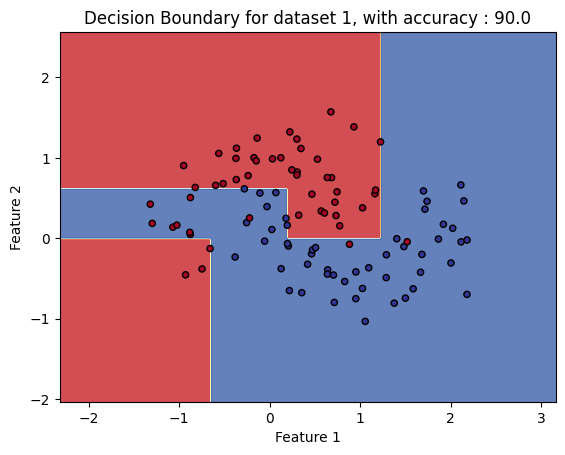



accuracy score for dataset 2 : 92.0 %




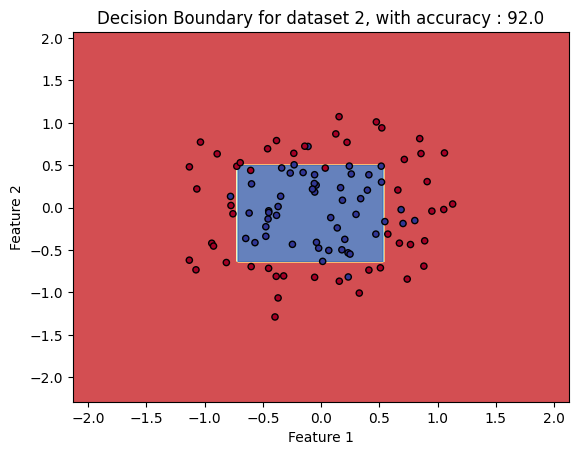



accuracy score for dataset 3 : 99.0 %




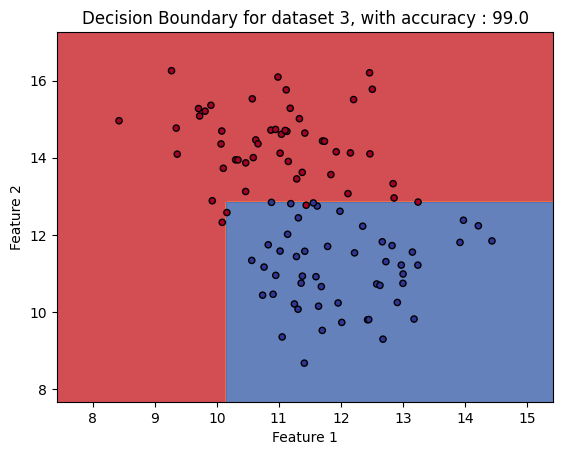

In [30]:
def accuracy(y_test, y_pred):
    correct = sum(1 for true, pred in zip(y_test, y_pred) if true == pred)
    total = len(y_test)
    return correct / total if total != 0 else 0 # pour éviter la division par zéro


dataset_count=0

for i in datasets:
  dataset_count = dataset_count+1
  X = list(i[0])
  Y = list(i[1])

  X_train, X_test, Y_train, Y_test = X, X, Y, Y

  clf = DecisionTree(criterion="gini", min_samples_split=19, max_depth=10)
  clf.fit(X_train, Y_train)

  Y_pred = clf.predict(X_test)
  acc=accuracy(Y_test, Y_pred)*100
  print("\n\naccuracy score for dataset", dataset_count, ":", acc,"%\n\n")

  plot_decision_boundary(X_train, Y_train, clf, f'Decision Boundary for dataset {dataset_count}, with accuracy : {acc}')

## Forêt Aléatoire

In [31]:
class RandomForest:
    def __init__(self, n_estimators=100, criterion="gini"):
    # Initialisation de la classe avec deux paramètres optionnels : le nombre d'estimateurs (par défaut, 100) et le critère de scission (par défaut, "gini").
      self.n_estimators = n_estimators  # Nombre d'estimateurs dans la forêt.
      self.criterion = criterion  # Critère utilisé pour mesurer la qualité d'une scission dans l'arbre.

      # Initialisation d'une liste vide pour stocker les modèles d'arbre de décision dans la forêt.
      self.forest = []

      # Initialisation d'une liste vide pour stocker les ensembles de fonctionnalités utilisés par chaque arbre de la forêt.
      self.feature_sets = []


    def fit(self, X, Y):
    # Nombre total de fonctionnalités dans les données
      num_features = len(X[0])

      # Nombre maximal de fonctionnalités à utiliser pour chaque arbre (80%)
      max_features = int(0.8 * num_features)

      # Boucle sur le nombre d'estimateurs pour construire la forêt
      for _ in range(self.n_estimators):
          # Échantillon bootstrap pour créer un sous-ensemble aléatoire des données
          bootstrap_indices = [i for i in range(len(X))]
          bootstrap_X = [X[i] for i in bootstrap_indices]
          bootstrap_Y = [Y[i] for i in bootstrap_indices]

          # Sélectionner un ensemble aléatoire de fonctionnalités sans remplacement
          selected_features = self.select_features(num_features, max_features)

          # Sauvegarder les fonctionnalités sélectionnées pour les prédictions ultérieures
          self.feature_sets.append(selected_features)

          # Créer un arbre de décision avec les paramètres spécifiés
          tree = DecisionTree(criterion=self.criterion, min_samples_split=3, max_depth=30)

          # Adapter l'arbre aux données avec seulement les fonctionnalités sélectionnées
          tree.fit([[x[i] for i in selected_features] for x in bootstrap_X], bootstrap_Y)

          # Ajouter l'arbre à la forêt
          self.forest.append(tree)


    def select_features(self, num_features, max_features):
        # Initialiser la liste de features
        remaining_features = list(range(num_features))

        # Shuffler la liste d'une maniére aléatoire
        remaining_features=self.custom_shuffle(remaining_features)

        # Selectionner les premiéres features (aleatoire)
        selected_features = remaining_features[:max_features]

        return selected_features

    def custom_shuffle(self , lst):
      length = len(lst)

      # Paramètres pour le générateur congruentiel linéaire
      a = 1664525
      c = 1013904223
      m = 2**32

      # Seed initial
      seed = 42  # Choisissez une valeur de départ arbitraire

      for i in range(length - 1, 0, -1):
          # Choix d'un index aléatoire entre 0 et i inclus
          seed = (a * seed + c) % m
          j = seed % (i + 1)

          # Échangez les éléments aux indices i et j
          lst[i], lst[j] = lst[j], lst[i]

      return lst

    def predict(self, X):
        #recuperer les predictions des arbres de la foret
        predictions = [tree.predict([[x[i] for i in features] for x in X]) for tree, features in zip(self.forest, self.feature_sets)]
        # Tvote majoritaire
        final_predictions = [max(set(x), key=x.count) for x in zip(*predictions)]
        return final_predictions


accuracy score for dataset 1 : 99.0 %


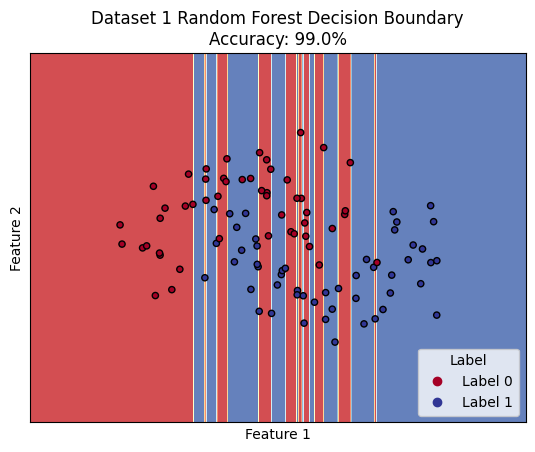

accuracy score for dataset 2 : 95.0 %


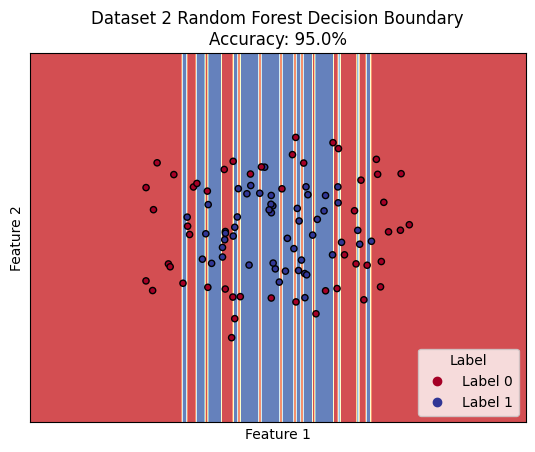

accuracy score for dataset 3 : 98.0 %


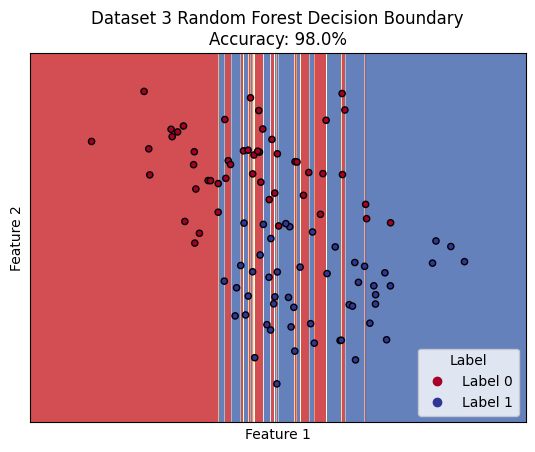

In [32]:

import pandas as pd
dataset_count = 0

for i in datasets:
    dataset_count += 1
    X = i[0]
    # Y est la colonne cible

    Y = i[1]

    # Fixez une seed pour la reproductibilité
    random_state = 40
    #utiliser tout les données pour l'entrainement et le test
    X_train, X_test = X,X
    Y_train, Y_test = Y,Y



    #initialiser et entrainer le modéle de foret
    random_forest = RandomForest(n_estimators=150, criterion="gini")
    random_forest.fit(X_train, Y_train)
    #calculer l'accuracy
    Y_pred = [int(round(y)) for y in random_forest.predict(X_test)]
    acc=accuracy(Y_test, Y_pred)*100
    print("accuracy score for dataset", dataset_count, ":", acc,"%")
    feature_names=get_feature_names(X)
    # Plot decision boundary with feature names for RandomForest
    plot_decision_boundary_forest(X_train, Y_train, random_forest, f'Dataset {dataset_count} Random Forest Decision Boundary\nAccuracy: {acc}%', feature_names=feature_names)


accuracy score for dataset 1 : 99.0 %


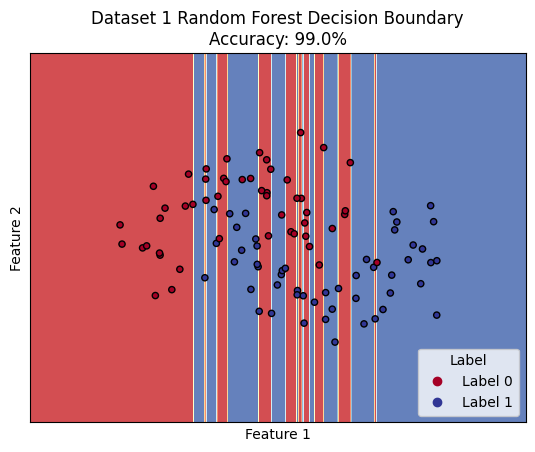

accuracy score for dataset 2 : 95.0 %


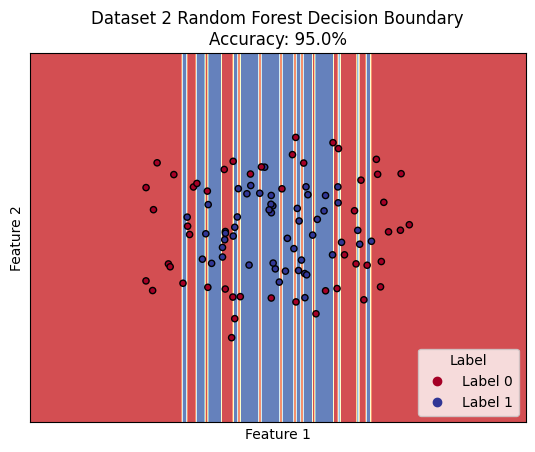

accuracy score for dataset 3 : 98.0 %


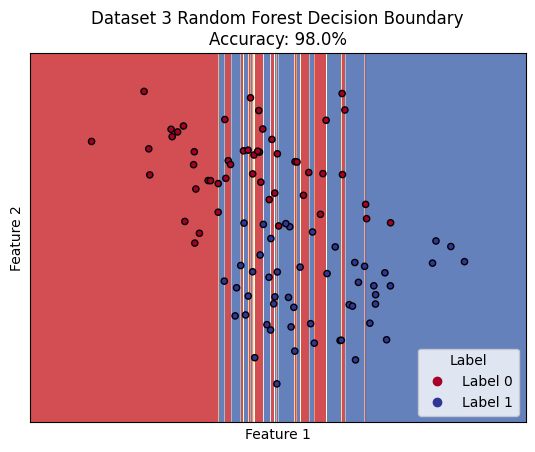

In [34]:
import pandas as pd
dataset_count = 0

for i in datasets:
    dataset_count += 1
    X = i[0]
    # Y est la colonne cible

    Y = i[1]

    # Fixez une seed pour la reproductibilité
    random_state = 40
    #utiliser tout les données pour l'entrainement et le test
    X_train, X_test = X,X
    Y_train, Y_test = Y,Y



    #initialiser et entrainer le modéle de foret
    random_forest = RandomForest(n_estimators=150, criterion="entropy")
    random_forest.fit(X_train, Y_train)
    #calculer l'accuracy
    Y_pred = [int(round(y)) for y in random_forest.predict(X_test)]
    acc=accuracy(Y_test, Y_pred)*100
    print("accuracy score for dataset", dataset_count, ":", acc,"%")
    feature_names=get_feature_names(X)
    # Plot decision boundary with feature names for RandomForest
    plot_decision_boundary_forest(X_train, Y_train, random_forest, f'Dataset {dataset_count} Random Forest Decision Boundary\nAccuracy: {acc}%', feature_names=feature_names)


# CVXPY: Machine à Vecteurs de Support

In [35]:
from sklearn.datasets import make_moons, make_circles, make_blobs
import numpy as np
import cvxpy as cp
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from cvxpy.atoms.affine.reshape import deep_flatten, reshape
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import warnings
import pandas as pd
warnings.filterwarnings("ignore")


datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=100, centers=2, n_features=2, center_box=(0, 20), random_state=0)
]

### classe svm:

In [36]:
class SVM:
  def __init__(self,kernel,C) -> None:
    match kernel.lower():
      case "linear":
        self.kernel = 'linear'
      case "rbf":
        self.kernel = 'rbf'
      case _:
        print(f'You can use either Linear or RBF, {kernel} does not exist')
    self.c = C


  def __rbf_kernel(self,X1  ,  X2   ,sigma = 1) :
    if np.ndim(X1) == 1 and np.ndim(X2) == 1:
        result = np.exp(- (np.linalg.norm(X1 - X2, 2)) ** 2 / (2 * sigma ** 2))
    elif (np.ndim(X1) > 1 and np.ndim(X2) == 1) or (np.ndim(X1) == 1 and np.ndim(X2) > 1):
        result = np.exp(- (np.linalg.norm(X1 - X2, 2, axis=1) ** 2) / (2 * sigma ** 2))
    elif np.ndim(X1) > 1 and np.ndim(X2) > 1:
        result = np.exp(- (np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :], 2, axis=2) ** 2) / (2 * sigma ** 2))
    return result



  def fit(self, X, y):
      # Récupère les dimensions du X
      n, d = np.shape(X)

      # Déclare la variable d'optimisation alpha de taille n
      alpha = cp.Variable(n)

      # Initialise la matrice de noyau K en fonction du type de noyau
      K = np.array([])
      if self.kernel == 'rbf':
          K = self.__rbf_kernel(X, X)
          self.c = float('inf')
      else:
          K = X @ X.T

      # Construit la matrice P utilisée dans la fonction objectif de l'optimisation SVM
      P = np.outer(y, y) * K

      # Définit la fonction objectif pour l'optimisation SVM
      objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, cp.Parameter(shape=P.shape, value=P, PSD=True)))

      # Définit les contraintes de l'optimisation SVM
      alphas_constraint_1 = [alpha[i] >= 0 for i in range(n)]
      alphas_constraint_2 = [alpha[i] <= self.c for i in range(n)]
      alphas_constraint_3 = [y @ alpha == 0]
      constraints = alphas_constraint_1 + alphas_constraint_2 + alphas_constraint_3

      # Déclare le problème d'optimisation SVM
      prob = cp.Problem(objective, constraints)
      prob.solve()

      # Récupère les valeurs optimales de la variable d'optimisation alpha
      self.alpha = alpha.value

      # Seuil de tolérance pour identifier les vecteurs de support
      tolerance = 1e-4

      # Trouve les indices des alphas non nuls (vecteurs de support)
      self.support_vector_indices = np.where(self.alpha >= tolerance)[0]
      self.alpha = self.alpha[self.support_vector_indices]

      # Extrait les vecteurs de support de vos données originales
      self.support_vectors = X[self.support_vector_indices]

      # Si vous avez des étiquettes de classe, vous pouvez également extraire les étiquettes des vecteurs de support
      self.support_vector_labels = y[self.support_vector_indices]

      # Calcule le vecteur de poids w
      self.w = np.sum((self.alpha * self.support_vector_labels)[:, np.newaxis] * self.support_vectors, axis=0)

      # Initialise la somme pour le calcul du terme de biais
      somme = 0

      # Calcule le terme de biais (self.b) en fonction du type de noyau
      if self.kernel == 'rbf':
          for i in range(len(self.support_vectors)):
              somme += self.support_vector_labels[i] - (self.alpha[i] * self.support_vector_labels[i]) * self.__rbf_kernel(self.support_vectors, self.support_vectors[i])
          self.b = np.mean(somme)
      else:
          # Calcule le terme de biais (self.b) pour le noyau linéaire
          self.b = np.mean(self.support_vector_labels - np.sum(self.w * self.support_vectors, axis=1))

      # Affiche les résultats du modèle SVM
      print(f"w = {self.w} | biais : {self.b}")



  def predict(self, X_test, chunk_size=100):
      # Obtenir le nombre d'échantillons dans l'ensemble de test
      N_test = X_test.shape[0]

      # Initialiser un tableau pour stocker les scores de la fonction de décision pour chaque échantillon de test
      scores = np.zeros(N_test)

      # Parcourir l'ensemble de test par blocs car j'avais un probleme de RAM durant le calcule du Kernel
      for i in range(0, N_test, chunk_size):
          start = i
          end = min(i + chunk_size, N_test)

          # Extraire le bloc actuel de l'ensemble de test
          X_test_chunk = X_test[start:end]

          # Initialiser un tableau pour stocker les valeurs de la fonction de décision pour le bloc actuel
          scores_chunk = np.array([])

          for vec in X_test_chunk:
              # Initialiser la valeur de la fonction de décision pour l'échantillon actuel
              decision = 0

              for i in range(len(self.alpha)):
                  if self.kernel == 'rbf':
                      # Cas du noyau RBF
                      decision += self.alpha[i] * self.support_vector_labels[i] * self.__rbf_kernel(self.support_vectors[i], vec)
                  else:
                      # Cas du noyau linéaire
                      decision += self.alpha[i] * self.support_vector_labels[i] * np.dot(self.support_vectors[i], vec)

              # Ajouter le terme de biais
              decision += self.b

              # Ajouter la valeur de la fonction de décision au tableau du bloc
              scores_chunk = np.append(scores_chunk, decision)

          # Faire des prédictions pour le bloc actuel en fonction du signe de la valeur de la fonction de décision
          predictions_chunk = np.sign(scores_chunk)

          # Stocker les prédictions dans le tableau résultant
          scores[start:end] = predictions_chunk

      # Retourner le tableau final des scores de la fonction de décision pour l'ensemble du jeu de test
      return scores


### Cas Linéaire vs Scikit learn:

w = [ 0.58617095 -0.66781149] | biais : -0.12640203450422174


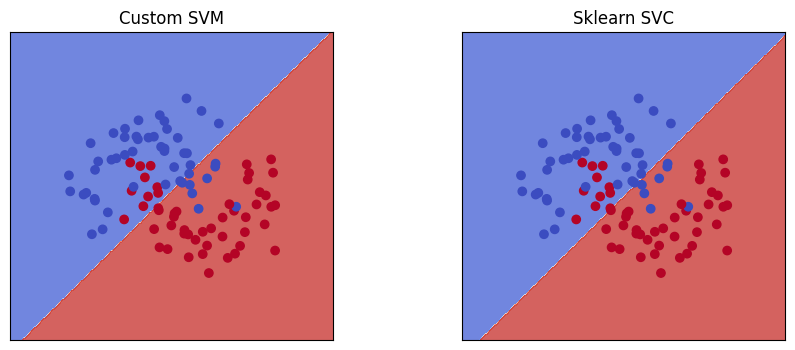




w = [ 0.00878105 -0.00707015] | biais : -4.0910065152570675e-05


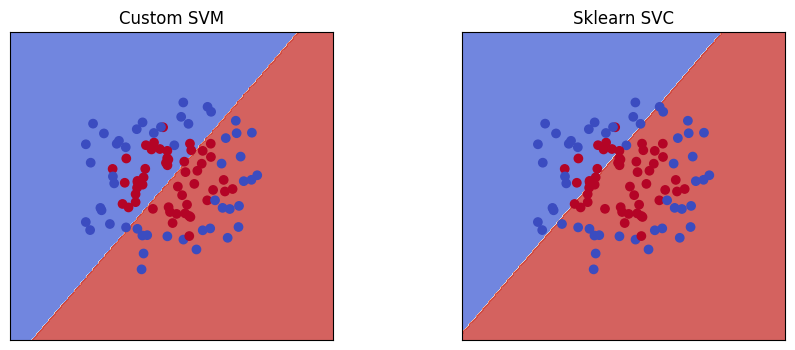




w = [ 0.19410507 -0.68172149] | biais : 6.431086278268175


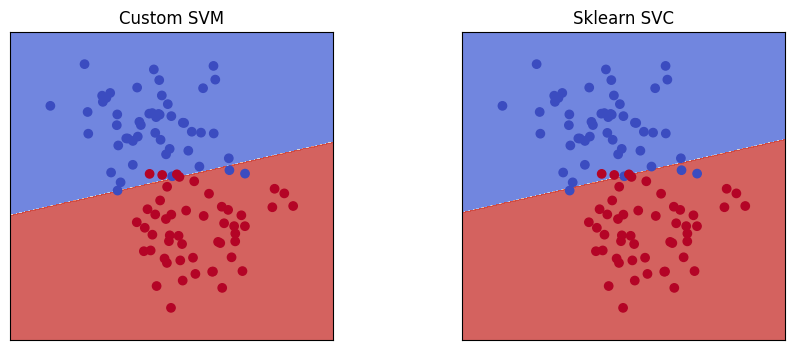

In [37]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

def plot_svm_comparison(X, y, kernel='linear', C=0.025, gamma=0.5):
    fig = plt.figure(figsize=(10, 4))

    # Preprocess labels for SVM
    y = np.where(y == 0, -1, 1)

    # SVM regularization parameter
    custom_svm = SVM(kernel=kernel, C=C)
    custom_svm.fit(X, y)

    # Sklearn SVM
    sklearn_svc = svm.SVC(kernel=kernel, C=C, gamma=gamma)
    sklearn_svc.fit(X, y)

    # create a mesh to plot in
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['Custom SVM',
              'Sklearn SVC',
              ]

    for i, clf in enumerate((custom_svm, sklearn_svc)):
        plt.subplot(1, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()
    print("\n\n")

# Example usage
for id in range(3):
    X_data = datasets[id][0]
    y_data = datasets[id][1]
    plot_svm_comparison(X_data, y_data, kernel='linear', C=0.025)


### Cas du Kernel (RBF) vs Scikit learn

w = [1977.01450635 -707.10310664] | biais : -44.37882166191395


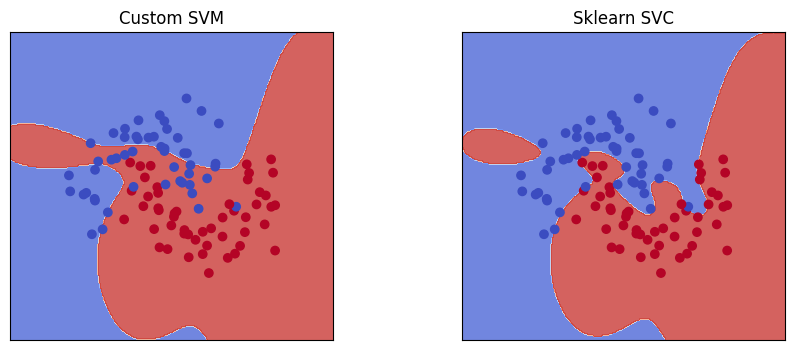




w = [ 2018.15452963 -4673.48473705] | biais : -968.0066865600096


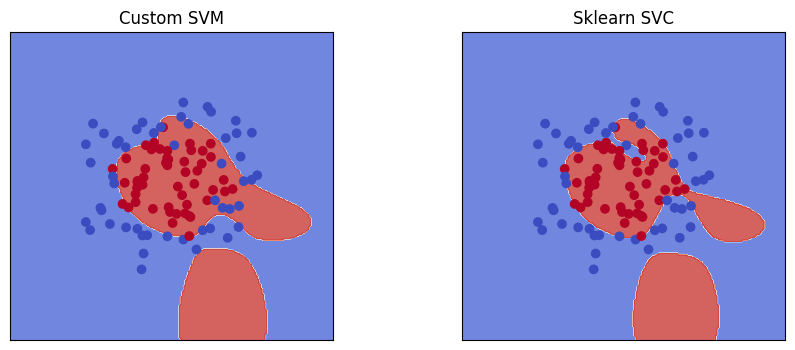




w = [ 174.5986673  -417.83972307] | biais : -18.09619405022457


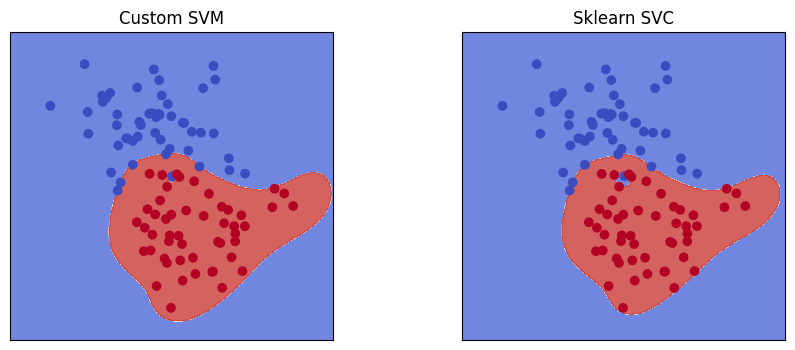

In [38]:
# Example usage
for id in range(3):
    X_data = datasets[id][0]
    y_data = datasets[id][1]
    # C == infinité dans le cas de Custom SVM et égal a 1e20 pour sklearn car il n'accepte pas l'infinité comme argument
    plot_svm_comparison(X_data, y_data, kernel='rbf', C=1e20)